# Problem Statement:

<h4>With the rise of social media advertising, it’s essential to understand which users are more likely to respond to targeted ads. This project aims to analyze user demographics to predict purchasing behavior on social network ads. Given a dataset containing user information, including 'Gender', 'Age', 'EstimatedSalary', and whether they made a purchase ('Purchased'), the goal is to build a predictive model to classify users as likely or unlikely to purchase based on these features. This classification will help in tailoring ad targeting strategies, optimizing ad spend, and improving conversion rates.</h4>

<b>Dataset Link: https://www.kaggle.com/datasets/rakeshrau/social-network-ads</b>

<b>Note: When data is scaled for training then provide scaled data for testing</b>

# Importing Libraries

In [138]:
# Fundamental files
import numpy as np # Faster Mathematical Operation
import pandas # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, # Encoding Categorical Data
    StandardScaler # Scaling data to small range -x to x
)

# Data splits
from sklearn.model_selection import KFold # K - Fold cross validation
from sklearn.model_selection import train_test_split # Train Test split

# Various Machine Learning Models
from sklearn.linear_model import LogisticRegression # Logistic Regression - Sigmoid function
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier - Iterative Dichotomiser 3
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier - Bunches of Decision Tree
from sklearn.neighbors import KNeighborsClassifier # K - nearest neighbour - Distance formula & Ranking
from sklearn.svm import SVC # Support Vector Machine Classifier - Hyperplane
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes - Bayes theorem

# Accuracy
from sklearn.metrics import accuracy_score # Accuracy score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Randomized search cv to find best model parameter

# Model Dumping & Loading
import joblib # Dumping & Loading model

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [ ]:
data = pandas.read_csv('/content/Social_Network_Ads.csv')

# EDA (Exploratory Data Analysis) - Data Exploration, Data Manipulation, Data Cleaning, Data Visualization

In [ ]:
# First Five data points
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Last Five data points
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
# (no. of rows, no. of columns)
data.shape

(400, 5)

In [ ]:
# No. of elements
data.size

2000

In [ ]:
# Data Dimension
data.ndim

2

In [ ]:
# Column names
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
# Checking for Null values
data.isnull().sum().sum()

0

In [ ]:
# Checking for Duplicates
data.duplicated().sum()

0

In [ ]:
# Exploring Gender column
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

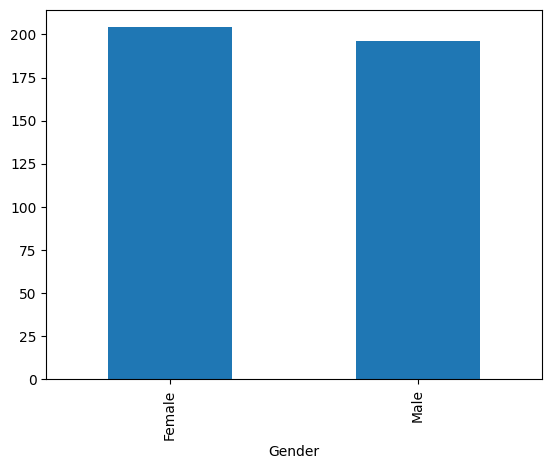

In [ ]:
# Frequency of unique values in Gender column
data['Gender'].value_counts().plot(kind = 'bar')
plt.show()

Gender data seems properly distributed.

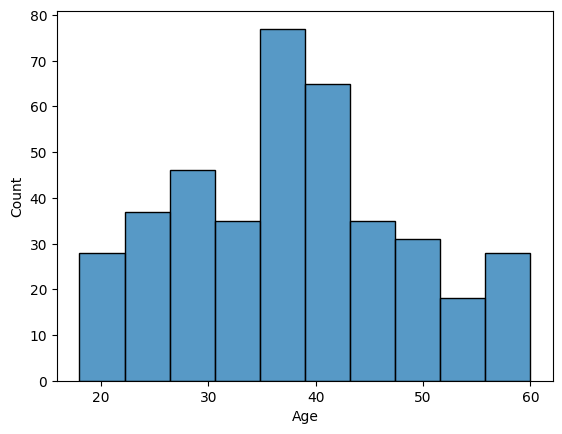

In [ ]:
# Visualizing Age column
sns.histplot(data['Age'])
plt.show()

Almost, Normally distributed

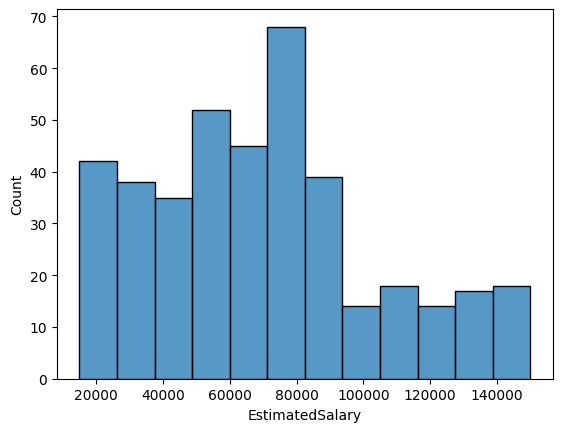

In [ ]:
# Visualizing Estimated Salary column
sns.histplot(data['EstimatedSalary'])
plt.show()

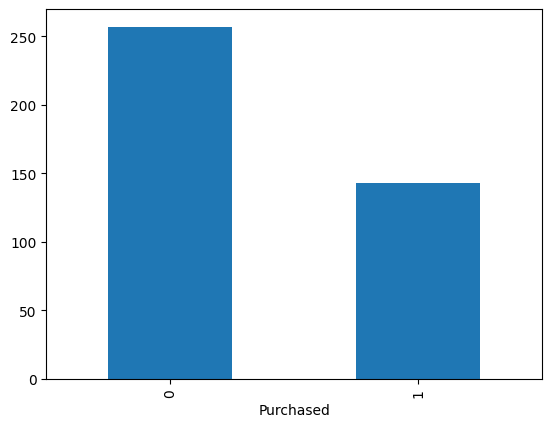

In [ ]:
# Frequency of unique values in Purchased column
data['Purchased'].value_counts().plot(kind = 'bar')
plt.show()

Slightly imbalance but almost proper

In [ ]:
# Removing User_Id column, as it is not useful for our analysis or project making.
data.drop('User ID', axis = 1, inplace = True)

In [ ]:
# Viewing data
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


In [ ]:
# Encoding Gender column using label encoder (0, 1)
le = LabelEncoder() # Label Encoder object
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data['Gender'].value_counts()

,count
Gender,
0,204
1,196


0 is assigned to Female & </br>
1 is assigned to Male

In [ ]:
# Viewing data
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


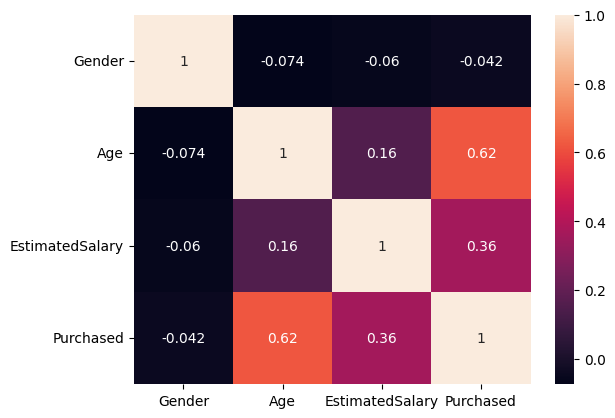

In [110]:
# Visualizing Correlation
sns.heatmap(data.corr(), annot=True)
plt.show()

# Standard scaling the data

## Formula:
```bash
(X - mean)/std_dev
```
where; X is datapoint, mean is the mean of that column, & std_dev is standard deviation of the column.

In [111]:
# Standard Scaling (-x to x)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [112]:
print(X_scaled)

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


# Data Splitting Features & Target

In [113]:
X = data.drop('Purchased', axis = 1).values
y = data['Purchased'].values

In [114]:
# X & y
print(X)
print(y)

[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


# Cross Validation, Fitting, & Evaluation

In [115]:
# Models
models = {}

models['Logistic Regression'] = LogisticRegression()
models['Decision Tree'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['KNN'] = KNeighborsClassifier()
models['SVM'] = SVC()
models['Naive Bayes'] = GaussianNB()

In [116]:
# Initialize an empty dictionary to store accuracies for each model
accuracies = {model_name: [] for model_name in models.keys()}

In [117]:
accuracies

{'Logistic Regression': [],
 'Decision Tree': [],
 'Random Forest': [],
 'KNN': [],
 'SVM': [],
 'Naive Bayes': []}

In [118]:
# Set up K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and test sets for this fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))

        # Append the accuracy for this fold to the appropriate list in the accuracies dictionary
        accuracies[model_name].append(accuracy)

# Display the accuracies dictionary to see accuracy values for each fold per model
print("Accuracies across 10 folds for each model:")
for model_name, scores in accuracies.items():
    print(f"{model_name}: {scores}")

Accuracies across 10 folds for each model:
Logistic Regression: [0.95, 0.875, 0.8, 0.825, 0.75, 0.775, 0.725, 0.875, 0.975, 0.875]
Decision Tree: [0.925, 0.875, 0.85, 0.825, 0.7, 0.875, 0.775, 0.875, 0.925, 0.9]
Random Forest: [0.925, 0.95, 0.875, 0.85, 0.8, 0.95, 0.8, 0.9, 0.95, 0.975]
KNN: [0.925, 0.975, 0.85, 0.9, 0.85, 0.925, 0.85, 0.9, 0.975, 0.95]
SVM: [0.925, 0.975, 0.85, 0.9, 0.85, 0.9, 0.875, 0.9, 0.95, 0.95]
Naive Bayes: [0.95, 0.9, 0.825, 0.85, 0.8, 0.825, 0.825, 0.9, 1.0, 0.975]


In [119]:
# Mean of each model accuracy
for model_name, scores in accuracies.items():
    mean_accuracy = sum(scores) / len(scores)
    print(f"{model_name} Mean Accuracy: {mean_accuracy}")

Logistic Regression Mean Accuracy: 0.8425
Decision Tree Mean Accuracy: 0.8525
Random Forest Mean Accuracy: 0.8975
KNN Mean Accuracy: 0.9099999999999999
SVM Mean Accuracy: 0.9075
Naive Bayes Mean Accuracy: 0.8850000000000001


We have used Cross Validation for reliability check of the model.

# Train Test Split

In [120]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

# Hyperparameter tuning best model

As we can see from above, Knn is the best model with an average accuracy of around 91%

In [121]:
# Hyperparameter tuning knn using RandomizedSearchCV
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 22, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [122]:
# Using randomized search cv on our parameter grid
knn_random = RandomizedSearchCV(
    estimator = KNeighborsClassifier(),
    param_distributions = param_grid,
    n_iter = 100,
    cv = 3,
    random_state = 0
)

In [123]:
search = knn_random.fit(X_train, y_train) # Finding best params

In [124]:
# Best parameter
search.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'metric': 'minkowski'}

In [125]:
model_hypertun = search

In [126]:
# Predict
y_pred = model_hypertun.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


As we can see, we gain accuracy after hyperparameter tuning.

# Prediction Table

In [127]:
# DataFrame of y_test & y_pred as Actual & Predicted
prediction_table = pandas.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_table.head(5)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [128]:
# Last datapoints
prediction_table.tail(5)

,Actual,Predicted
75,0,0
76,0,0
77,0,0
78,1,1
79,1,1


Awesome

# StreamLit app creation

In [129]:
# Gender info
data['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Gender
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [130]:
# Description of Gneder column
data['Gender'].describe()

,Gender
count,400.000000
mean,0.490000
std,0.500526
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [131]:
# Two dictionary named mean & std for holding mean and std of each scaled columns.
mean = {
    'Gender': data['Gender'].mean(),
    'Age': data['Age'].mean(),
    'EstimatedSalary': data['EstimatedSalary'].mean()
}
std = {
    'Gender': data['Gender'].std(),
    'Age': data['Age'].std(),
    'EstimatedSalary': data['EstimatedSalary'].std()
}

# Reading the dictionary
print(mean)
print(std)

{'Gender': 0.49, 'Age': 37.655, 'EstimatedSalary': 69742.5}
{'Gender': 0.5005260390723666, 'Age': 10.48287659730792, 'EstimatedSalary': 34096.960282424785}


In [132]:
# First five data points
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [133]:
# Prediction before testing - Should Corresponds to 0
print(model_hypertun.predict([[
    ((data['Gender'][0] - mean['Gender']) / std['Gender']),
    ((data['Age'][0] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][0] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

print(model_hypertun.predict([[
    ((data['Gender'][1] - mean['Gender']) / std['Gender']),
    ((data['Age'][1] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][1] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

print(model_hypertun.predict([[
    ((data['Gender'][2] - mean['Gender']) / std['Gender']),
    ((data['Age'][2] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][2] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

[0]
[0]
[0]


In [134]:
# Tail
data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
399,0,49,36000,1


In [137]:
# Prediction before testing - Should Corresponds to 1
print(model_hypertun.predict([[
    ((data['Gender'][389] - mean['Gender'])/ std['Gender']),
    ((data['Age'][389] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][389] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

print(model_hypertun.predict([[
    ((data['Gender'][397] - mean['Gender'])/ std['Gender']),
    ((data['Age'][397] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][397] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

print(model_hypertun.predict([[
    ((data['Gender'][396] - mean['Gender'])/ std['Gender']),
    ((data['Age'][396] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][396] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

[1]
[1]
[1]


Perfect

In [139]:
# Dumping the model using joblib
joblib.dump(model_hypertun, 'model.joblib')

['model.joblib']

In [140]:
# Load the model for final testing
model = joblib.load('model.joblib')

# Prediction before testing - Should Corresponds to 1
print(model.predict([[
    ((data['Gender'][389] - mean['Gender'])/ std['Gender']),
    ((data['Age'][389] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][389] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

# Prediction before testing - Should Corresponds to 0
print(model.predict([[
    ((data['Gender'][0] - mean['Gender']) / std['Gender']),
    ((data['Age'][0] - mean['Age']) / std['Age']),
    ((data['EstimatedSalary'][0] - mean['EstimatedSalary']) / std['EstimatedSalary'])
]]))

[1]
[0]


Perfect

In [141]:
# Installation of streamlit
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.6 MB/s eta 0:00:00


In [145]:
%%writefile app.py
import streamlit as st
import joblib

# Load the model
model = joblib.load('model.joblib')

# Mean & std
mean = {'Gender': 0.49,
        'Age': 37.655,
        'EstimatedSalary': 69742.5
}

std = {'Gender': 0.5005260390723666,
       'Age': 10.48287659730792,
       'EstimatedSalary': 34096.960282424785
}

# Project description on web interface
st.title("Predicting Purchase Behavior on Social Network Ads Using Machine Learning")
st.header("Leveraging Machine Learning for Classifying User Response to Social Network Ads")
st.markdown("""
    This application uses advanced machine learning algorithms to predict User Response (Will_Purchase - Yes/ No)
    based on Gender, Age, & EstimatedSlary. After testing multiple models, we have selected the most reliable
    model to ensure accurate predictions with hyperparameter tuning and cross-validation for improved reliability.
    This will help to in target marketing as the company can reach out to potential leads for making customers.
""")

# Metrics
st.metric(label="K - Nearest Neighbour accuracy", value="95%", delta="Up 4.90001% from previous model")

# User Input
gender = st.selectbox("Gender", ["Male", "Female"]) # Gender
gender_encoded = 1 if gender == "Male" else 0 # Convert the Gender to numerical encoding
age = st.number_input("Age", min_value=18, max_value=60, value=30) # Age
salary = st.number_input("EstimatedSalary", min_value=15000, max_value=150000, value=50000) # Salary

# Standard Scaling function
def scale_input(input_data):
    # Using zip to directly pair each feature value with its mean and std_dev
    return [(value - mean[key]) / std[key] for value, key in zip(input_data, mean.keys())]

# Prediction
scaled_data = scale_input([gender_encoded, age, salary]) # Scaling the data
pred = model.predict([scaled_data])
result = "probably not purchase" if pred[0] == 0 else "probably purchase"

# Output
if st.button("Predict"):
    st.success(f"The user with age {age}, gender {gender}, & salary {salary} will {result}, If your advertisement is displayed.")

Overwriting app.py


In [147]:
# Curl is to find the address
!curl https://loca.lt/mytunnelpassword
!streamlit run app.py & npx localtunnel --port 8501 --subdomain myuniquetunnel123

34.42.231.141


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.231.141:8501

your url is: https://myuniquetunnel123.loca.lt
  Stopping...
^C


# Git Push

In [177]:
# Mounting the Google Drive with Google Colab Notebook
# from google.colab import drive
# drive.mount('/content/drive')

In [176]:
# Define the destination directory
# destination_dir="/content/drive/MyDrive/SocialNetworkAds"

# # Move all files to the destination directory
# !mv /content/Social_Network_Ads.csv $destination_dir
# !mv /content/app.py $destination_dir
# !mv /content/model.joblib $destination_dir

In [174]:
# Direct towards project directory
# %cd "/content/drive/MyDrive/SocialNetworkAds"

In [173]:
# Configuration of the user
# !git config --global user.name "user_name"
# !git config --global user.email "your_email@domain.root"

In [172]:
# Initializing the folder as git folder
# !git init

In [171]:
# Checking existing branches
# !git branch

In [170]:
# !git branch -m master

In [169]:
# Adding the branch
# !git remote add origin https://github.com/user_name/your_repo_name.git

In [168]:
# Adding all files & Commit
# !git add .
# !git commit -m "Initial commit"

In [167]:
# Pushing ahead all files
# !git push -u origin master

In [166]:
# !git remote set-url origin https://your_token@github.com/user_name/your_repo_name.git

In [165]:
# !git push -u origin master

#Conclusion:

Got an accuarcy of about 95% using KNN model after fine-tuning the model.

## Future work:
1. Remove Gender column as there is nearly no correlation with the target column.
2. Retrain the model with updated dataset.
3. Check the accuracy